In [1]:
import numpy as np
from matplotlib import pyplot as plt

# MPI-Mainz database

In [2]:
from PhotoData import MPI_Mainz # import

In [3]:
species = 'C2H2'
mpi = MPI_Mainz(species) # seach MPI database for species
mpi.get_data() # get all data corresponding to species

In [4]:
# mpi.all_data contains all data from search
# its a dictionary. Here are its keys
for key in mpi.all_data.keys():
    print(key)

wavelength
cross section
temperature
year
papers
bibtex


In [5]:
print('First data file')
print('---------------')
print('number of data points =',len(mpi.all_data['wavelength'][0]))
print('Paper = ',mpi.all_data['papers'][0])
print('bibtex citation = \n\n',mpi.all_data['bibtex'][0])

First data file
---------------
number of data points = 5290
Paper =  Benilan(2000)
bibtex citation = 

 @article{B_nilan_2000,
	doi = {10.1016/s0032-0633(00)00019-2},
	url = {https://doi.org/10.1016%2Fs0032-0633%2800%2900019-2},
	year = 2000,
	month = {apr},
	publisher = {Elsevier {BV}},
	volume = {48},
	number = {5},
	pages = {463--471},
	author = {Y. B{\'{e}}nilan and N. Smith and A. Jolly and F. Raulin},
	title = {The long wavelength range temperature variations of the mid-{UV} acetylene absorption coefficient},
	journal = {Planetary and Space Science}
}


`mpi.find_best_data()` tries to put together the single "best" string of wavelengths and cross sections that using all the data. The keyword `best` determines the critera for the best data

- `best = 'max resolution'` - Use data with the maximum wavelength resolution.
- `best = 'most recent'` - Most recent published data.
- `best = 'smallest xsection'` - Data with the smallest cross section values
- `best = 'largest xsection'` - Data with the largest cross section values
- `best = 'single longest'` - Single study which spans the largest wavelength range.

In [6]:
mpi.find_best_data(best='max resolution')
print(mpi.best_data)

{'wavelength': array([  6.2  ,   6.26 ,   6.33 , ..., 236.277, 236.283, 236.29 ]), 'cross section': array([1.8700e-19, 1.7600e-19, 1.7600e-19, ..., 8.6408e-23, 1.0410e-22,
       1.2716e-22])}


In [7]:
# citations for the best data are stored in `mpi.best_data_citations`
for key in mpi.best_data_citations.keys():
    print(key)

print()
for i in range(len(mpi.best_data_citations['wavelength range'])):
    print(mpi.best_data_citations['citation'][i],mpi.best_data_citations['wavelength range'][i])

citation
wavelength range
bibtex

Cooper(1995) [6.2, 26.2]
WuJudge(1985) [26.2, 66.2]
MetzgerCook(1964) [66.2, 76.2]
Han(1989) [76.2, 96.2]
WalkerWeissler(1955) [96.2, 106.2]
NakayamaWatanabe(1964) [106.2, 116.2]
Cheng(2011) [116.2, 146.2]
Smith(1991) [146.2, 196.2]
Wu(1989) [196.2, 206.2]
Chen(1991) [206.2, 226.2]
Benilan(2000) [226.2, 236.29]


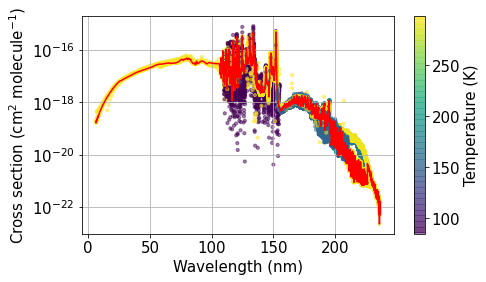

In [8]:
# plot the best data:
# red = best data
# other colors = all data
fig, ax = mpi.plot()
plt.show()

In [9]:
# I can try to retrieve data used by the Atmos photochem model
mpi.get_atmos_data(species)
for key in mpi.atmos_data.keys():
    print(key)

alinc
vpl
mpi
zahnle


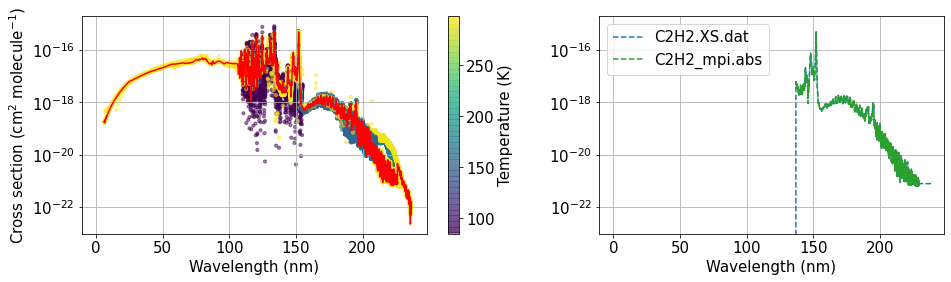

In [10]:
# I can compare these new xsections to the atmos data
fig, ax = mpi.plot(plot_atmos=True)
plt.show()

Generate a pdf citation. You must have `pdflatex` and `bibtex` installed for `mpi.generate_pdf()` to work.

In [11]:
mpi.generate_tex(plot_atmos = True)
mpi.generate_pdf()

# Phidrates database

In [12]:
from PhotoData import phidrates # import

In [13]:
species = 'C2H2'
phi = phidrates(species) # get all data for species

In [14]:
# two names for each reaction
print(phi.neutral.reactions) # neutral reactions
print(phi.neutral.branches) # neutral reactions

['C2 + H2', 'C2H + H']
['C2/H2', 'C2H/H']


In [15]:
# ion reactions
print(phi.ion.reactions) # ion reactions
print(phi.ion.branches) # ion reactions

['C2H2+ + e', 'C2H+ + H + e', 'C2H2*']
['C2H2+', 'C2H+H', 'C2H2**']


In [16]:
# data is stored in phi.neutral.data
for key in phi.neutral.data.keys():
    print(key)

wavelength
cross section
C2/H2
C2H/H


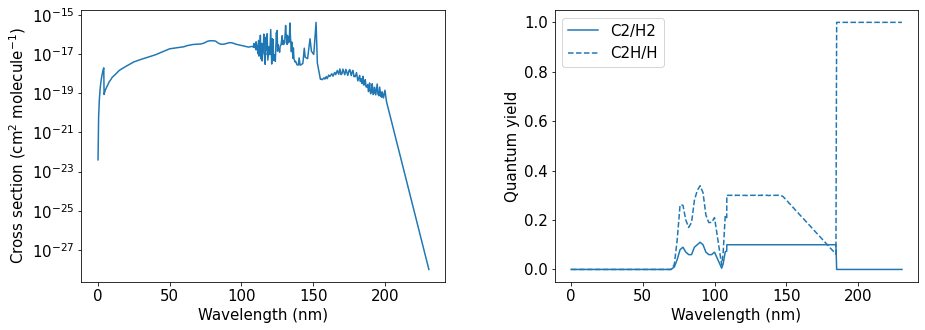

In [17]:
plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(1,2,figsize = [15,5])

ax[0].plot(phi.neutral.data['wavelength'],phi.neutral.data['cross section'])
ax[0].set_ylabel('Cross section (cm$^2$ molecule$^{-1}$)')
ax[0].set_xlabel('Wavelength (nm)')
ax[0].set_yscale('log')

lines = ['-','--']
for i,branch in enumerate(phi.neutral.branches):
    ax[1].plot(phi.neutral.data['wavelength'],phi.neutral.data[branch],'C0'+lines[i],label=branch)
ax[1].set_ylabel('Quantum yield')
ax[1].set_xlabel('Wavelength (nm)')
ax[1].legend()

plt.subplots_adjust(wspace=.3)
plt.show()

In [18]:
# references stored in phi.meta_data
for key in phi.meta_data.keys():
    print(key)

Total
C2H2+
C2H+H
C2/H2
C2H/H


In [19]:
# dict in dict
for key in phi.meta_data['Total'].keys():
    print(key)

wavelengths
references
bibtex


In [20]:
# wavelength range and corresponding reference
print(phi.meta_data['Total']['wavelengths'][0])
print()
print(phi.meta_data['Total']['references'][0])
print()
print(phi.meta_data['Total']['bibtex'][0])

[60.0, 100.0]

['Metzger, P. H., Cook, G. R. (1964) J. Chem. Phys. 41, 642']

['@article{metzger1964continuous,\n abstract = {The hydrogen‐containing molecules H2O, NH3, CH4, C2H2, C2H4, and C2H6 have strong continuous absorption spectra in the 12 to 21 eV (600‐to‐1000‐Å) region. Photoionization and absorption coefficients and cross sections have been computed from absorption and ionization spectra using the Hopfield He continuum as a continuous background‐radiation source. A parallel plate combination absorption and ionization chamber was used behind the exit slit of a Seya scanning vacuum monochromator arranged for 0.5 Å bandwidth. Data},\n author = {Metzger, PH and Cook, GR},\n journal = {The Journal of Chemical Physics},\n number = {3},\n pages = {642--648},\n pub_year = {1964},\n publisher = {American Institute of Physics},\n title = {On the Continuous Absorption, Photoionization, and Fluorescence of H2O, NH3, CH4, C2H2, C2H4, and C2H6 in the 600-to-1000-{\\AA} Region},\n venue = 

In [21]:
# compare to atmos data
phi.get_atmos_data(species) # get it
phi.atmos_data

{'wavelength': array([119. , 119.1, 119.2, ..., 239.7, 239.8, 239.9]),
 'cross section': array([0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 7.868756e-22,
        7.868756e-22, 7.868756e-22]),
 'C2H/H': array([0.3, 0.3, 0.3, ..., 0.3, 0.3, 0.3]),
 'C2/H2': array([0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1])}

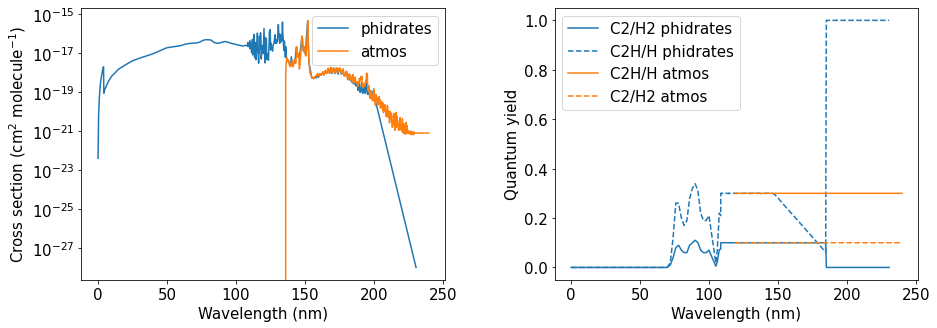

In [22]:
plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(1,2,figsize = [15,5])

ax[0].plot(phi.neutral.data['wavelength'],phi.neutral.data['cross section'],label='phidrates')
ax[0].plot(phi.atmos_data['wavelength'],phi.atmos_data['cross section'],label='atmos')
ax[0].set_ylabel('Cross section (cm$^2$ molecule$^{-1}$)')
ax[0].set_xlabel('Wavelength (nm)')
ax[0].set_yscale('log')
ax[0].legend()

lines = ['-','--']
for i,branch in enumerate(phi.neutral.branches):
    ax[1].plot(phi.neutral.data['wavelength'],phi.neutral.data[branch],'C0'+lines[i],label=branch+' phidrates')
for i,branch in enumerate(phi.atmos_branches):
    ax[1].plot(phi.atmos_data['wavelength'],phi.atmos_data[branch],'C1'+lines[i],label=branch+' atmos')
ax[1].set_ylabel('Quantum yield')
ax[1].set_xlabel('Wavelength (nm)')
ax[1].legend()

plt.subplots_adjust(wspace=.3)
plt.show()